# Import libraries

In [1]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import LancasterStemmer, PorterStemmer
import matplotlib.pyplot as plt
from customtkinter import *

In [2]:
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('all')

# Data reading

In [3]:
df = pd.read_csv('gplay_scrape_uber.csv')

In [4]:
df.head()

,Unnamed: 0,content,score
0,0,"Just got a free month of Uber One, I've been o...",1
1,1,Don't count on Uber if your ride is time sensi...,1
2,2,This app used to be easy and convenient but th...,1
3,3,I would rate this app 5/5 if it weren't for th...,3
4,4,Terrible update. So much more difficult to nav...,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  50000 non-null  int64 
 1   content     50000 non-null  object
 2   score       50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [6]:
df = pd.read_csv('gplay_scrape_uber.csv', index_col=0)

df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

df.rename(columns={'content': 'text'}, inplace=True)

In [7]:
df.head()

,text,score
0,"Just got a free month of Uber One, I've been o...",1
1,Don't count on Uber if your ride is time sensi...,1
2,This app used to be easy and convenient but th...,1
3,I would rate this app 5/5 if it weren't for th...,3
4,Terrible update. So much more difficult to nav...,1


In [8]:
# def get_sentiment(text):
#     return TextBlob(text).sentiment.polarity

# df['sentiment_polarity'] = df['text'].apply(get_sentiment)
# df.head()

In [9]:
df[df['score'] == 5]

,text,score
147,"The best ride app, out there! I have left my p...",5
183,I was very pleased with my Uber experience. Fi...,5
201,I've been using uber constantly for a year now...,5
222,I don't quite know how they make money but I'm...,5
315,"The app is great, but you have far too many dr...",5
...,...,...
49962,I do think a feature should be added where you...,5
49963,"Responsive, effective and efecient Service",5
49969,The app is ok. The rides are from one point to...,5
49976,"We were waiting at the Brit, in Jacksonville, ...",5


In [10]:
stop_words = set(stopwords.words('english'))

stemmer = PorterStemmer()

In [11]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r'@\w+','',text)
    text = re.sub(r'http\S+','',text)
    text = re.sub(r'^\w\s','',text)
    text = re.sub(r'\s+',' ',text)
    text = re.sub(r'\d+','',text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = text.replace('Ã¢â‚¬Â¦', '')
    tokens = word_tokenize(text)
    filtered = [word for word in tokens if word not in stop_words]
    stemmed = [stemmer.stem(word) for word in filtered]
    return stemmed

In [12]:
df['text'] = df['text'].apply(preprocess)

In [13]:
df.head()

,text,score
0,"[got, free, month, uber, one, ive, order, usua...",1
1,"[dont, count, uber, ride, time, sensit, reques...",1
2,"[app, use, easi, conveni, last, ride, complex,...",1
3,"[would, rate, app, werent, uber, cancel, small...",3
4,"[terribl, updat, much, difficult, navig, user,...",1


In [15]:
from textblob import TextBlob

def get_sentiment(raw):
    text = ' '.join(raw)
    polarity = TextBlob(text).sentiment.polarity  # Ambil nilai polaritas
    if polarity > 0:
        return 'positif'
    elif polarity == 0:
        return 'netral'
    else:
        return 'negatif'
    
df['sentiment'] = df['text'].apply(get_sentiment)

In [16]:
df

,text,score,sentiment
0,"[got, free, month, uber, one, ive, order, usua...",1,negatif
1,"[dont, count, uber, ride, time, sensit, reques...",1,positif
2,"[app, use, easi, conveni, last, ride, complex,...",1,negatif
3,"[would, rate, app, werent, uber, cancel, small...",3,negatif
4,"[terribl, updat, much, difficult, navig, user,...",1,negatif
...,...,...,...
49995,"[driver, start, ride, without, otp, mani, driv...",1,netral
49996,"[app, kind, okay, servic, issu, categori, wise...",4,positif
49997,"[driver, screen, process, kise, ko, bhi, drive...",1,netral
49998,"[compani, say, one, fare, charg, anoth, credit...",1,positif


In [17]:
def _tf(dox):
    tf_dict = {}
    for term in dox:
        if term in tf_dict:
            tf_dict[term] += 1
        else:
            tf_dict[term] = 1
    
    for term in tf_dict:
        tf_dict[term] = tf_dict[term] / len(dox)
    return tf_dict

In [18]:
df['tf'] = df['text'].apply(_tf)

In [19]:
df.head()

,text,score,sentiment,tf
0,"[got, free, month, uber, one, ive, order, usua...",1,negatif,"{'got': 0.022727272727272728, 'free': 0.022727..."
1,"[dont, count, uber, ride, time, sensit, reques...",1,positif,"{'dont': 0.020833333333333332, 'count': 0.0208..."
2,"[app, use, easi, conveni, last, ride, complex,...",1,negatif,"{'app': 0.05555555555555555, 'use': 0.05555555..."
3,"[would, rate, app, werent, uber, cancel, small...",3,negatif,"{'would': 0.041666666666666664, 'rate': 0.0208..."
4,"[terribl, updat, much, difficult, navig, user,...",1,negatif,"{'terribl': 0.03333333333333333, 'updat': 0.03..."


In [20]:
def calc_df(tf):
    count = {}
    for dox in tf:
        for term in dox:
            if term in count:
                count[term] +=1
            else:
                count[term] = 1
    return count

In [21]:
dict_freq = calc_df(df['tf'])

In [22]:
dict_freq

{'got': 3920,
 'free': 442,
 'month': 1650,
 'uber': 25631,
 'one': 7030,
 'ive': 3303,
 'order': 2649,
 'usual': 943,
 'app': 23027,
 'near': 580,
 'unus': 118,
 'often': 942,
 'fail': 590,
 'save': 650,
 'select': 1077,
 'custom': 9186,
 'item': 411,
 'end': 2824,
 'pay': 7121,
 'throw': 69,
 'away': 2441,
 'make': 4489,
 'complaint': 1430,
 'realli': 3036,
 'difficult': 746,
 'offer': 762,
 'credit': 1580,
 'never': 5314,
 'cover': 162,
 'cost': 1598,
 'im': 4437,
 'wait': 7023,
 'back': 3345,
 'rest': 143,
 'may': 643,
 'unaccept': 316,
 'dont': 8497,
 'count': 132,
 'ride': 18400,
 'time': 17767,
 'sensit': 35,
 'request': 3448,
 'dealership': 4,
 'get': 12676,
 'person': 1479,
 'work': 5340,
 'vehicl': 1149,
 'task': 36,
 'new': 2174,
 'driver': 27844,
 'multipl': 1461,
 'delay': 531,
 'arriv': 2508,
 'atempt': 3,
 'reach': 3009,
 'support': 4661,
 'spent': 250,
 'hour': 2693,
 'bot': 181,
 'redirect': 84,
 'websit': 308,
 'put': 1305,
 'miss': 1042,
 'direct': 859,
 'escal': 103

In [23]:
n_dox = len(df)

def idf(_n_dox, _df):
    idf_dict = {}
    for term in _df:
        idf_dict[term] = np.log10(_n_dox / (_df[term] + 1))
    return idf_dict

In [24]:
inverse_df = idf(n_dox,dict_freq)

In [25]:
inverse_df

{'got': np.float64(1.1054862944523836),
 'free': np.float64(2.0524794105295205),
 'month': np.float64(1.4811360634897965),
 'uber': np.float64(0.2901006423484466),
 'one': np.float64(0.851866038817236),
 'ive': np.float64(1.1798430981042456),
 'order': np.float64(1.2756372628157824),
 'usual': np.float64(1.7239111424545213),
 'app': np.float64(0.3366269159694939),
 'near': np.float64(1.9347070043622594),
 'unus': np.float64(2.6233361753600595),
 'often': np.float64(1.7243714440152618),
 'fail': np.float64(1.9272956558713348),
 'save': np.float64(1.8853021481843983),
 'select': np.float64(1.6662643759018703),
 'custom': np.float64(0.7357094203773386),
 'item': np.float64(2.0839859207194555),
 'end': np.float64(1.2478646845971328),
 'pay': np.float64(0.8462811674143553),
 'throw': np.float64(2.8537850967383336),
 'away': np.float64(1.3111374771437265),
 'make': np.float64(1.046636795749267),
 'complaint': np.float64(1.5432435029928138),
 'realli': np.float64(1.216438344834325),
 'difficu

In [26]:
def tfidf(tf):
    tfidif_dict  ={}
    for term in tf:
        tfidif_dict[term] = tf[term] * inverse_df[term]
    return tfidif_dict

df['tfidf'] = df['tf'].apply(tfidf)

In [27]:
df.head()

,text,score,sentiment,tf,tfidf
0,"[got, free, month, uber, one, ive, order, usua...",1,negatif,"{'got': 0.022727272727272728, 'free': 0.022727...","{'got': 0.025124688510281445, 'free': 0.046647..."
1,"[dont, count, uber, ride, time, sensit, reques...",1,positif,"{'dont': 0.020833333333333332, 'count': 0.0208...","{'dont': 0.016032633541647804, 'count': 0.0536..."
2,"[app, use, easi, conveni, last, ride, complex,...",1,negatif,"{'app': 0.05555555555555555, 'use': 0.05555555...","{'app': 0.01870149533163855, 'use': 0.03045318..."
3,"[would, rate, app, werent, uber, cancel, small...",3,negatif,"{'would': 0.041666666666666664, 'rate': 0.0208...","{'would': 0.044710684311119964, 'rate': 0.0262..."
4,"[terribl, updat, much, difficult, navig, user,...",1,negatif,"{'terribl': 0.03333333333333333, 'updat': 0.03...","{'terribl': 0.05093449777030936, 'updat': 0.04..."


In [28]:
sorted_df = sorted(dict_freq.items(), key= lambda kv: kv[1], reverse=True)[:n_dox]
unique_term = [item[0] for item in sorted_df]

def tfidf_vectorizer(_tfidf):
    tfidf_vect = [0.0] * len(unique_term)
    
    for i,term in enumerate(unique_term):
        if term in _tfidf:
            tfidf_vect[i] = _tfidf[term]
    return tfidf_vect

In [29]:
df['vectorized'] = df['tfidf'].apply(tfidf_vectorizer)

In [30]:
vector = df['vectorized']

In [31]:
print("print first row matrix TF_IDF_Vec Series\n")
print(df['vectorized'][0])

print("\nmatrix size : ", len(df['vectorized'][0]))

print first row matrix TF_IDF_Vec Series

[0.0, np.float64(0.0131863928340203), np.float64(0.007650611726579407), 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, np.float64(0.016720668644939513), 0.0, 0.0, np.float64(0.019233662895780802), np.float64(0.01936059179130082), np.float64(0.019370423496694184), 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, np.float64(0.0442445394496943), 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, np.float64(0.023787199903392432), 0.0, np.float64(0.047804356311663666), 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, np.float64(0.025124688510281445), 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, np.float64(0.026689936366504876), np.float64(0.053629231732011166), 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, np.float64(0.02764632601896193), 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, np.float64(0.028360561013571203), 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, np.float64(0.05798351194617193), 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [32]:
df['score'].value_counts()

score
1    31516
5     6325
2     5415
3     3946
4     2788
Name: count, dtype: int64

In [33]:
df['sentiment'].value_counts()

sentiment
positif    22073
negatif    19405
netral      8512
Name: count, dtype: int64

In [34]:
major = df[df['sentiment'] == 'positif']
mid = df[df['sentiment'] == 'negatif']
minor = df[df['sentiment'] == 'netral']
class_size = round(len(df) / df['sentiment'].nunique())

In [35]:
print(major.shape,minor.shape,mid.shape)

(22073, 6) (8512, 6) (19405, 6)


In [36]:
major_scaled = major.sample(class_size, replace=True)
mid_scaled = mid.sample(class_size,replace=True)
minor_scaled = minor.sample(class_size,replace=True)

dfs = pd.concat([major_scaled,minor_scaled,mid_scaled], ignore_index=True)

df = dfs.sample(frac=1,random_state=42).reset_index(drop=True)


In [37]:
df['sentiment'].value_counts()

sentiment
netral     16663
negatif    16663
positif    16663
Name: count, dtype: int64

In [38]:
unique = df['sentiment'].unique()
mapping = {label : idx for idx, label in enumerate(unique)}
df['sentiment'] = df['sentiment'].map(mapping)

In [39]:
mapping

{'netral': 0, 'negatif': 1, 'positif': 2}

In [40]:
df

,text,score,sentiment,tf,tfidf,vectorized
0,"[rd, septemb, pm, book, uberth, driver, name, ...",1,0,"{'rd': 0.025, 'septemb': 0.025, 'pm': 0.025, '...","{'rd': 0.05941659605046678, 'septemb': 0.07715...","[0.006353397863170309, 0.0, 0.0, 0.01085104278..."
1,"[driver, cancel, trip, block, away, never, cal...",1,1,"{'driver': 0.10714285714285714, 'cancel': 0.03...","{'driver': 0.027228847985015604, 'cancel': 0.0...","[0.027228847985015604, 0.0, 0.0120223898560533..."
2,"[speedi, respons, book, ride, comfort]",4,0,"{'speedi': 0.2, 'respons': 0.2, 'book': 0.2, '...","{'speedi': 0.6887221263298569, 'respons': 0.28...","[0.0, 0.0, 0.0, 0.08680834228468848, 0.0, 0.0,..."
3,"[your, due, nearbi, driver, avail, driver, fil...",3,2,"{'your': 0.02, 'due': 0.02, 'nearbi': 0.02, 'd...","{'your': 0.035117670867730995, 'due': 0.028771...","[0.025413591452681236, 0.0, 0.0067325383193898..."
4,"[past, month, driver, put, ac, say, uber, pay,...",1,1,"{'past': 0.05405405405405406, 'month': 0.05405...","{'past': 0.08757102452182387, 'month': 0.08006...","[0.013737076460908776, 0.007840557901309369, 0..."
...,...,...,...,...,...,...
49984,"[book, driver, call, ask, amount, scenario, sa...",1,2,"{'book': 0.020833333333333332, 'driver': 0.062...","{'book': 0.014432490219598665, 'driver': 0.015...","[0.01588349465792577, 0.018131290146777914, 0...."
49985,"[worst, servic, ever, cancel, mani, time, busi...",1,1,"{'worst': 0.03333333333333333, 'servic': 0.066...","{'worst': 0.03324383838988876, 'servic': 0.042...","[0.0, 0.0, 0.0, 0.0, 0.014974819707072422, 0.0..."
49986,"[worst, ever, app, biggest, scam, fare, got, i...",1,1,"{'worst': 0.034482758620689655, 'ever': 0.0344...","{'worst': 0.034390177644712513, 'ever': 0.0431...","[0.0, 0.0, 0.011607824688603238, 0.01496695556..."
49987,"[first, time, user, experi, good, driver, frie...",5,2,"{'first': 0.03571428571428571, 'time': 0.03571...","{'first': 0.042555967738434876, 'time': 0.0160...","[0.009076282661671868, 0.010360737226730235, 0..."


In [41]:
x = df['vectorized']
y = df['sentiment']

In [42]:
def strat(x,y, train_size = 0.8):
    np.random.seed(42)
    
    yidx = {}
    for i,label in enumerate(y) :
        if label in yidx:
            yidx[label].append(i)
        else:
            yidx[label] = [i]
            
    tridx = []
    teidx = []
    
    for label,i in yidx.items():
        shuffle = np.random.permutation(i)
        train = max(1, int(len(shuffle) * train_size))
        tridx.extend(shuffle[:train])
        teidx.extend(shuffle[train:])
        
    xtr = x.iloc[tridx].reset_index(drop=True)
    xte = x.iloc[teidx].reset_index(drop=True)
    ytr = y.iloc[tridx].reset_index(drop=True)
    yte = y.iloc[teidx].reset_index(drop=True)
    
    return xtr,xte,ytr,yte

In [43]:
xtr,xte,ytr,yte = strat(x,y,train_size=0.8)

In [44]:
print(xtr.shape)
print(xte.shape)
print(ytr.shape)
print(yte.shape)

(39990,)
(9999,)
(39990,)
(9999,)


In [45]:
ytr

0        0
1        0
2        0
3        0
4        0
        ..
39985    2
39986    2
39987    2
39988    2
39989    2
Name: sentiment, Length: 39990, dtype: int64

In [46]:
print(type(xtr))
print(type(xte))
print(type(ytr))
print(type(yte))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [47]:
xtr = np.array([np.array(row, dtype=np.float32) for row in xtr]) # 
xte = np.array([np.array(row, dtype=np.float32) for row in xte]) # 
ytr = np.array(ytr, dtype=np.float32) # 
yte = np.array(yte, dtype=np.float32) # 

MemoryError: Unable to allocate 4.19 GiB for an array with shape (39990, 28113) and data type float32

In [ ]:
xtr[0]

array([0.01495061, 0.        , 0.        , ..., 0.        , 0.        ,
       0.        ], dtype=float32)

In [ ]:
# Convert labels to categorical (one-hot encoding)
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
ytr_encoded = encoder.fit_transform(ytr.reshape(-1, 1))
yte_encoded = encoder.transform(yte.reshape(-1, 1))

In [ ]:
yte_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
svm = LinearSVC(random_state=42)
svm.fit(xtr,ytr)

LinearSVC(random_state=42)

In [ ]:
ypred = svm.predict(xte)

In [ ]:
print(f'acc = {accuracy_score(yte,ypred)}')
print(f'{classification_report(yte,ypred)}')

acc = 0.9108178364327134
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92      3334
         1.0       0.95      0.87      0.91      3334
         2.0       0.85      0.97      0.91      3334

    accuracy                           0.91     10002
   macro avg       0.92      0.91      0.91     10002
weighted avg       0.92      0.91      0.91     10002



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42,n_estimators=100)

In [ ]:
rf.fit(xtr,ytr)

ypredrf = rf.predict(xte)

In [ ]:
ypredrf

array([1., 0., 0., ..., 2., 2., 2.], dtype=float32)

In [ ]:
print(f'acc = {accuracy_score(yte,ypredrf)}')
print(f'{classification_report(yte,ypredrf)}')

acc = 0.9365126974605079
              precision    recall  f1-score   support

         0.0       0.92      0.93      0.93      3334
         1.0       0.96      0.90      0.93      3334
         2.0       0.93      0.98      0.95      3334

    accuracy                           0.94     10002
   macro avg       0.94      0.94      0.94     10002
weighted avg       0.94      0.94      0.94     10002



# DNN

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

: 

: 

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
initializer = tf.keras.initializers.GlorotUniform(seed=42)
optimizer = Adam(learning_rate=0.0007)
model = keras.Sequential([
    layers.Input(shape=(xtr.shape[1],)),  # Input size matches TF-IDF output
    layers.Dense(512, activation='relu',kernel_initializer=initializer, kernel_regularizer=l2(0.0005)),# 
    layers.Dropout(0.7),
    layers.Dense(256, activation='relu',kernel_initializer=initializer, kernel_regularizer=l2(0.0005)),# 
    layers.Dropout(0.6),
    layers.Dense(128, activation='relu',kernel_initializer=initializer, kernel_regularizer=l2(0.0005)),# 
    layers.Dense(3, activation='softmax')  # 3 output classes
])

In [ ]:
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [ ]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=4, restore_best_weights=True)

In [ ]:
def graph():
    # Extract accuracy and loss values
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(1, len(train_loss) + 1)

    # Plot Loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training vs Validation Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training vs Validation Accuracy')
    plt.legend()

    plt.show()


In [ ]:
history = model.fit(
    xtr, ytr_encoded,
    epochs=25,  # Will stop early if overfitting is detected
    batch_size=128,
    validation_data=(xte, yte_encoded),
    callbacks=[early_stop]
)

Epoch 1/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 64s 201ms/step - accuracy: 0.5118 - loss: 1.1183 - val_accuracy: 0.9145 - val_loss: 0.4680
Epoch 2/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 61s 195ms/step - accuracy: 0.9088 - loss: 0.4878 - val_accuracy: 0.9565 - val_loss: 0.4012
Epoch 3/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 62s 197ms/step - accuracy: 0.9488 - loss: 0.4158 - val_accuracy: 0.9647 - val_loss: 0.3847
Epoch 4/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 59s 190ms/step - accuracy: 0.9587 - loss: 0.3944 - val_accuracy: 0.9629 - val_loss: 0.3825
Epoch 5/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 61s 193ms/step - accuracy: 0.9612 - loss: 0.3855 - val_accuracy: 0.9696 - val_loss: 0.3743
Epoch 6/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 60s 191ms/step - accuracy: 0.9649 - loss: 0.3819 - val_accuracy: 0.9660 - val_loss: 0.3825
Epoch 7/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 61s 195ms/step - accuracy: 0.9641 - loss: 0.3840 - val_accuracy: 0.9729 - val_loss: 0.3747
Epoch 8/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 60s 193ms/step - accuracy: 0.9676 - loss: 0

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.9716 - loss: 0.3742
Test Accuracy: 0.9729


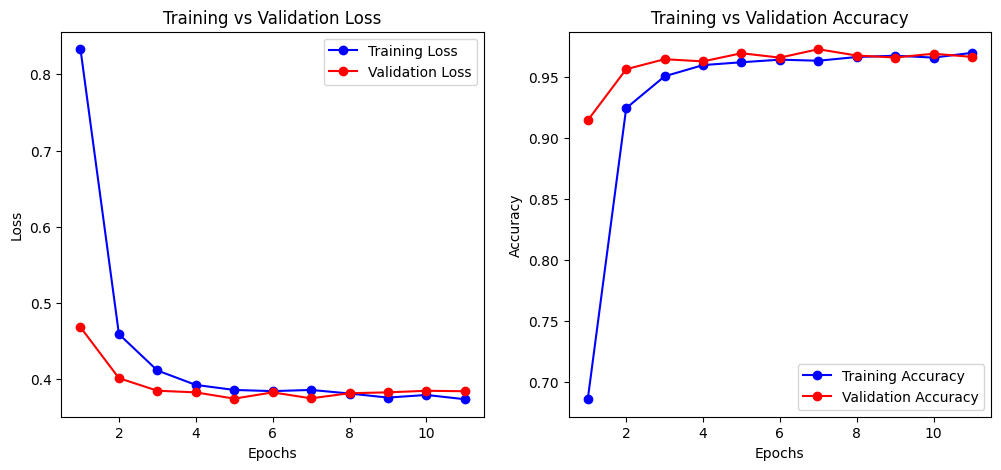

In [ ]:
test_loss, test_acc = model.evaluate(xte, yte_encoded)
print(f"Test Accuracy: {test_acc:.4f}")
graph()

In [ ]:
model.save('last_model.keras') #dinamakan setelah persentase akurasi

# GUI

In [ ]:
# Load model once at module level
from tensorflow.keras.models import load_model
dnn = load_model('last_model.keras')

class SentimentAnalysisApp:
    def __init__(self):
        self.setup_window()
        self.create_widgets()
        self.layout_widgets()
        
    def setup_window(self):x    
        """Initialize main window settings"""
        self.root = ctk.CTk()
        self.root.title('Uber Sentiment Analysis')
        self.root.geometry('700x400')
        self.root.resizable(False, False)
        ctk.set_appearance_mode('dark')
        
        # Center the window
        self.root.update_idletasks()
        x = (self.root.winfo_screenwidth() // 2) - (700 // 2)
        y = (self.root.winfo_screenheight() // 2) - (400 // 2)
        self.root.geometry(f'700x400+{x}+{y}')
        
    def create_widgets(self):
        """Create all UI widgets"""
        # Title
        self.title_label = ctk.CTkLabel(
            self.root,
            text='Mesin Pendeteksi Sentimen Review Uber',
            font=ctk.CTkFont(size=20, weight="bold")
        )
        
        # Input section frame
        self.input_frame = ctk.CTkFrame(self.root)
        
        # Input label and entry
        self.input_label = ctk.CTkLabel(
            self.input_frame,
            text='Masukkan Review Anda:',
            font=ctk.CTkFont(size=14)
        )
        
        self.input_entry = ctk.CTkEntry(
            self.input_frame,
            placeholder_text='Ketik review Anda di sini...',
            width=400,
            height=35,
            font=ctk.CTkFont(size=12)
        )
        
        # Model selection
        self.model_label = ctk.CTkLabel(
            self.input_frame,
            text='Pilih Model:',
            font=ctk.CTkFont(size=14)
        )
        
        self.model_combo = ctk.CTkComboBox(
            self.input_frame,
            values=['SVM', 'Random Forest', 'DNN'],
            width=150,
            height=35,
            font=ctk.CTkFont(size=12)
        )
        self.model_combo.set('SVM')  # Default selection
        
        # Analyze button
        self.analyze_button = ctk.CTkButton(
            self.input_frame,
            text='Analisis Sentimen',
            command=self.analyze_sentiment,
            width=150,
            height=35,
            font=ctk.CTkFont(size=14, weight="bold"),
            fg_color='#2B83F6',
            hover_color='#1F5F99'
        )
        
        # Output section frame
        self.output_frame = ctk.CTkFrame(self.root)
        
        # Output label
        self.output_title = ctk.CTkLabel(
            self.output_frame,
            text='Hasil Analisis:',
            font=ctk.CTkFont(size=14, weight="bold")
        )
        
        # Output result
        self.output_label = ctk.CTkLabel(
            self.output_frame,
            text='Belum ada hasil. Silakan masukkan review dan pilih model.',
            font=ctk.CTkFont(size=13),
            wraplength=600
        )
        
    def layout_widgets(self):
        """Arrange widgets using grid layout"""
        # Main layout with padding
        self.root.grid_columnconfigure(0, weight=1)
        self.root.grid_rowconfigure(1, weight=1)
        self.root.grid_rowconfigure(2, weight=1)
        
        # Title
        self.title_label.grid(row=0, column=0, pady=(20, 30), sticky="ew")
        
        # Input frame
        self.input_frame.grid(row=1, column=0, padx=40, pady=(0, 20), sticky="ew")
        self.input_frame.grid_columnconfigure(1, weight=1)
        
        # Input section layout
        self.input_label.grid(row=0, column=0, columnspan=3, pady=(20, 10), sticky="w")
        self.input_entry.grid(row=1, column=0, columnspan=3, pady=(0, 20), sticky="ew")
        
        self.model_label.grid(row=2, column=0, pady=(0, 10), sticky="w")
        self.model_combo.grid(row=2, column=1, padx=(10, 0), pady=(0, 10), sticky="w")
        self.analyze_button.grid(row=2, column=2, padx=(20, 0), pady=(0, 10), sticky="e")
        
        # Add padding to input frame
        for child in self.input_frame.winfo_children():
            child.grid_configure(padx=20)
        
        # Output frame
        self.output_frame.grid(row=2, column=0, padx=40, pady=(0, 30), sticky="ew")
        
        # Output section layout
        self.output_title.grid(row=0, column=0, pady=(20, 10), sticky="w")
        self.output_label.grid(row=1, column=0, pady=(0, 20), sticky="w")
        
        # Add padding to output frame
        for child in self.output_frame.winfo_children():
            child.grid_configure(padx=20)
    
    def analyze_sentiment(self):
        """Process the input and display sentiment analysis result"""
        try:
            # Get input values
            model_choice = self.model_combo.get()
            input_text = self.input_entry.get().strip()
            
            # Validate input
            if not input_text:
                self.show_error('Harap masukkan review terlebih dahulu!')
                return
            
            # Show processing message
            self.output_label.configure(
                text='Sedang memproses...',
                text_color='yellow'
            )
            self.root.update()
            
            # Process the input (assuming these functions exist)
            series_input = pd.Series(input_text)
            input_preprocess = pd.Series(series_input.apply(preprocess))
            input_tf = input_preprocess.apply(_tf)
            input_tfidf = input_tf.apply(tfidf)
            input_vectorized = input_tfidf.apply(tfidf_vectorizer)
            input_ready = np.array([np.array(row) for row in input_vectorized])
            
            # Make prediction based on selected model
            if model_choice == 'SVM':
                prediction = svm.predict(input_ready)
            elif model_choice == 'Random Forest':
                prediction = rf.predict(input_ready)
            else:  # DNN
                prediction = np.argmax(dnn.predict(input_ready)) + 1
            
            # Map prediction to sentiment
            sentiment_map = {1: 'Kritik', 2: 'Mixed', 3: 'Pujian'}
            sentiment = sentiment_map.get(
                prediction.item() if hasattr(prediction, 'item') else prediction,
                "Unknown"
            )
            
            # Display result with appropriate color
            color_map = {'Kritik': '#FF6B6B', 'Mixed': '#FFE66D', 'Pujian': '#4ECDC4'}
            result_color = color_map.get(sentiment, 'white')
            
            self.output_label.configure(
                text=f'Hasil: "{input_text}"\n\nSentimen yang terdeteksi: {sentiment}\nModel yang digunakan: {model_choice}',
                text_color=result_color
            )
            
        except Exception as e:
            self.show_error(f'Terjadi kesalahan: {str(e)}')
    
    def show_error(self, message):
        """Display error message"""
        self.output_label.configure(
            text=message,
            text_color='#FF6B6B'
        )
    
    def run(self):
        """Start the application"""
        self.root.mainloop()

def gui_call():
    """Main function to run the sentiment analysis GUI"""
    app = SentimentAnalysisApp()
    app.run()

# Example usage
if __name__ == "__main__":
    gui_call()

NameError: name 'load_model' is not defined